# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. You can write your answer on a seperate paper (submit as *.pdf) or type it below and submit together with Part B as a single *.ipynb file.


### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)

*Your answer here*

By definition, the Perceptron can be defined by 
$$
z = -1.5 x_0 + x_1 + x_2
$$
where $x_0 = 1$, and
$$
\phi (z) = 
\begin{cases}
1, & \text{if } z \ge 0 \\
0, & \text{otherwise}
\end{cases}
$$
Therefore, by inserting the given $x_1$ and $x_2$ values, we have the outputs $0$, $0$, $0$, and $1$ respectively.


### A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR


*Your answer here*

To define Perceptrons, we first define the input for AND, NOT, NAND, NOR as
$$
\begin{array}{lll}
z_{AND} & = & -1.5 x_0 + x_1 + x_2 \\
z_{NOT} & = & 0.5 x_0 + (-1) x_1 \\
z_{NAND} & = & 1.5 x_0 + (-1) x_1 + (-1) x_2 \\
z_{NOR} & = & 0.5 x_0 + (-1) x_1 + (-1) x_2
\end{array}
$$
where $x_0 = 1$, and the decision function for all 4 inputs as
$$
\phi (z) = 
\begin{cases}
1, & \text{if } z \ge 0 \\
0, & \text{otherwise}
\end{cases}
$$

### A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


*Your answer here*

For 3 inputs $x_1$, $x_2$ and $x_3$, we have the following table of samples:
$$
\begin{array}{ccc|c}
x_1 & x_2 & x_3 & \phi(z) \\
\hline
0 & 0 & 0 & 1 \\
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
0 & 1 & 1 & 1 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 \\
\end{array}
$$
A quick check of the samples reveals that the two classes, with $\phi(z)$ at $0$ and $1$ respectively, aren't linearly separable. Therefore, the convergence of the Perceptron isn't guaranteed; it can't learn the parity problem for 3 inputs.

### A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


*Your answer here*

We firstly plot the points and the optimal separating line:

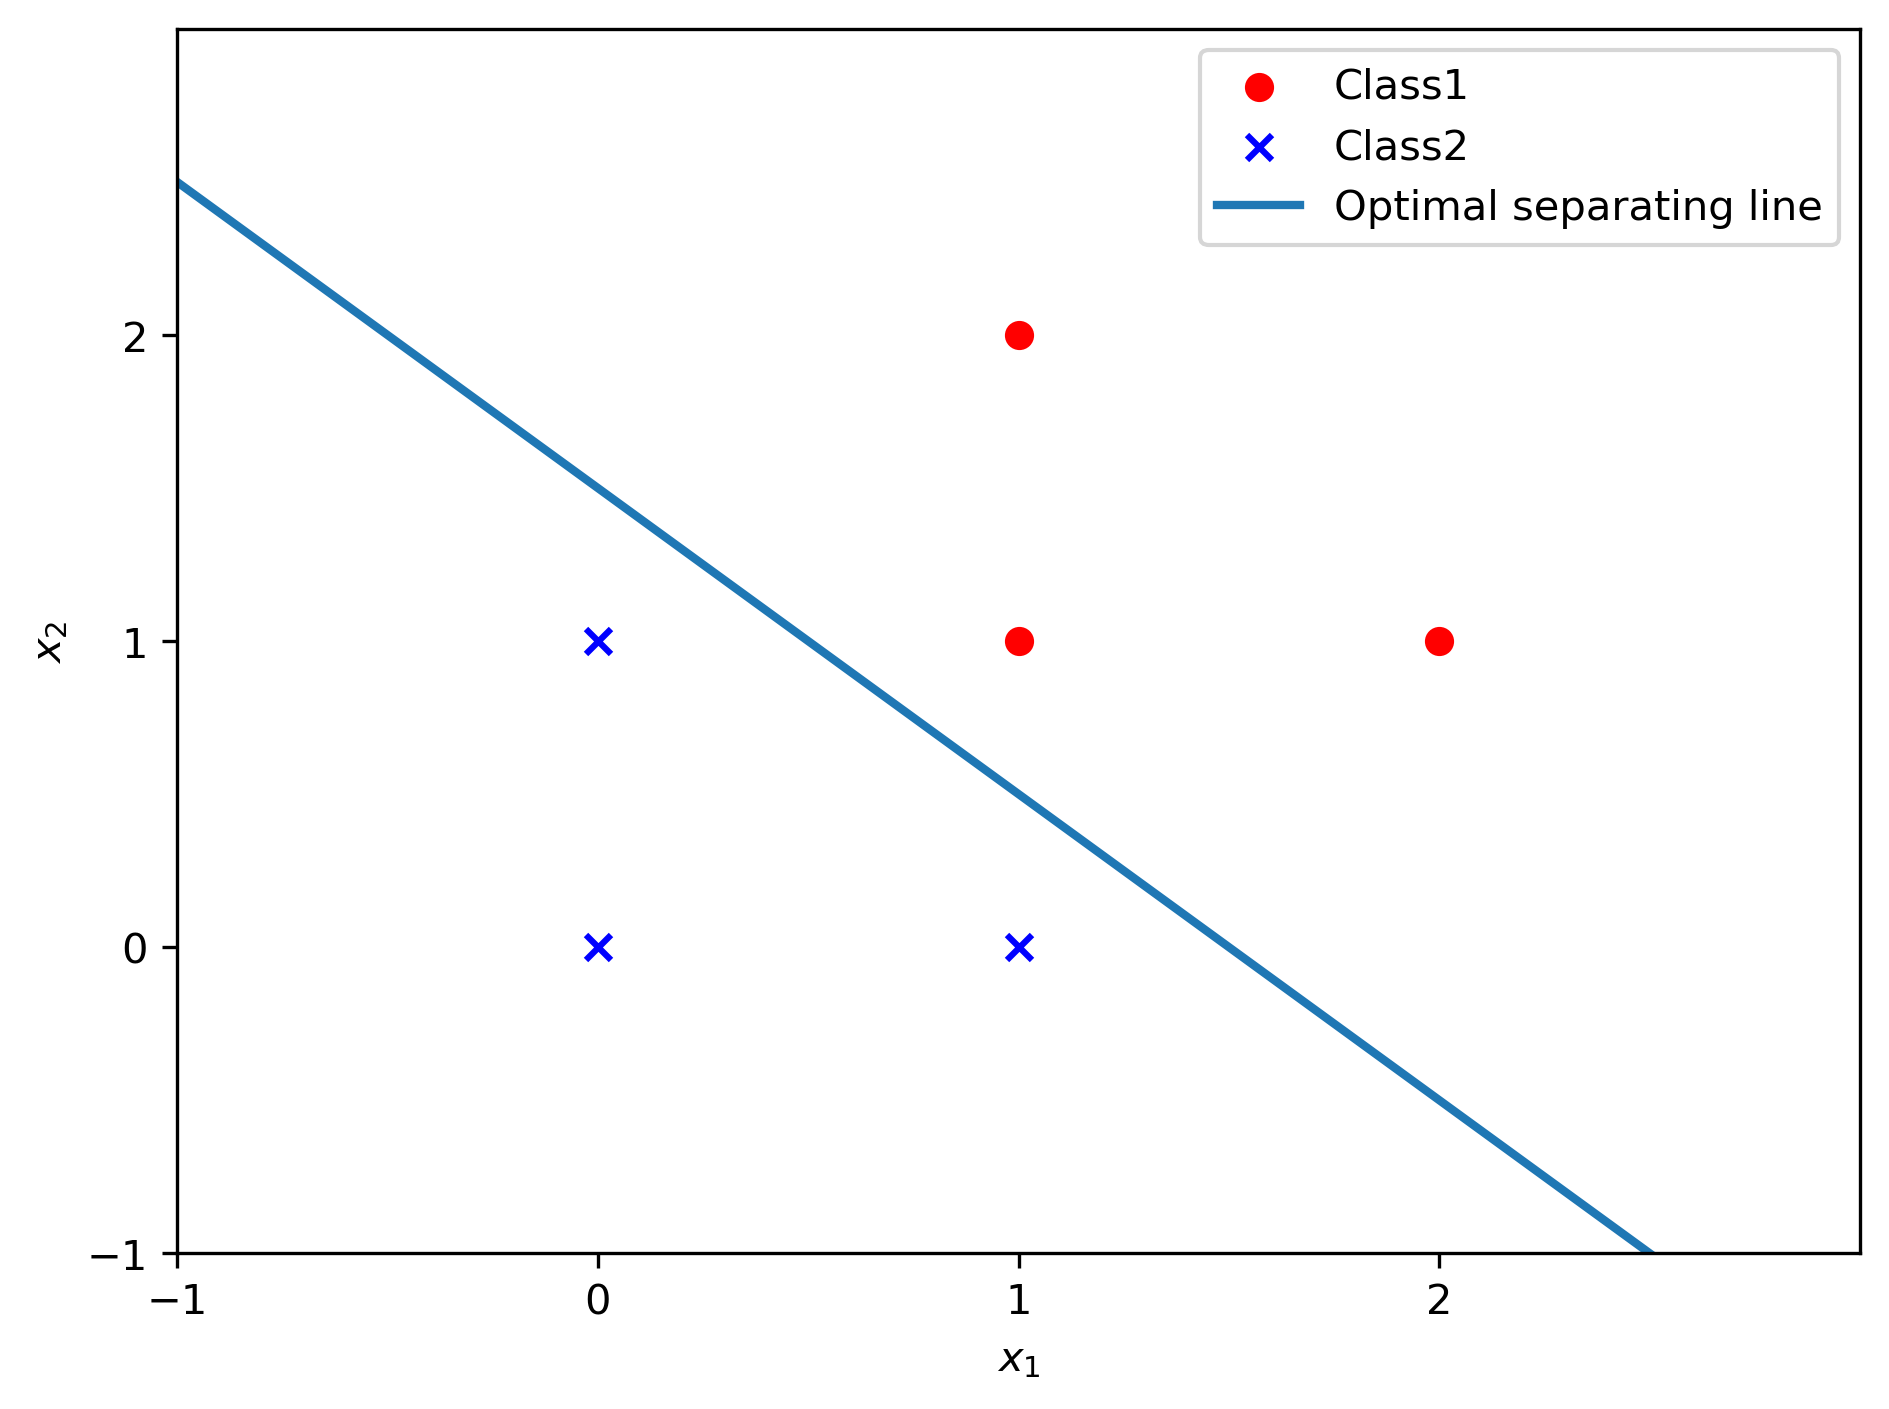

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd

# prepare given set of points
X = pd.DataFrame([(1, 1), (1, 2), (2, 1), (0, 0), (1, 0), (0, 1)])

# prepare separating line
x = np.linspace(-1, 3, 40)
y = 1.5 - x

# plot data ...
fig, ax = plt.subplots()

# ... in two classes
ax.scatter(X[:3][0], X[:3][1],
            color='red', marker='o', label='Class1')
ax.scatter(X[3:6][0], X[3:6][1],
            color='blue', marker='x', label='Class2')

# plot separating line
ax.plot(x, y, linewidth=2.0, label='Optimal separating line')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper right')

ax.set(xlim=(-1, 3), xticks=np.arange(-1, 3),
       ylim=(-1, 3), yticks=np.arange(-1, 3))

plt.tight_layout()
plt.show()

The support vectors are $(0, 1)$, $(1, 0)$, and $(1, 1)$. When applying SVM to a set of data, we try to fit the widest possible street. The support vectors are those samples located on the edge of the street that fully determine (or support) the decision boundary.

### A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


*Your answer here*

By definition, we have
$$
\begin{align*}
I_h(t) & = - \sum_{i = 1}^c p(i|t) \log_2 p(i|t) \\
& = -(P(first) \log_2 P(first) + \cdots + P(fifth) \log_2 P(fifth)) \\
& = -(0.5 \times \log_2 0.5 + 4 \times 0.125 \times \log_2 0.125) \\
& = 2
\end{align*}
$$
The entropy criterion attempts to maximize the mutual information in a decision tree. Since in a 5-ary class setting, if the classes are distributed uniformly, the entropy is $-\log_2 0.2$, or around $2.32$, the entropy of the given probabilities suggest that the classes are close to perfectly mixed.

### A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?

*Your answer here*

<img src="https://raw.githubusercontent.com/Summer-Shen/comp7404-a4/master/images/a6.png" alt="decision tree for logical AND function" style="zoom:33%" />

Decision trees can be more robust than Perceptrons; however, since the logical AND function is simple and the limited samples are perfectly linear separable, the two solutions only differ in their way of handling the problem. The Peceptron can have lower time complexity, while the decision tree is more straightforward.

### A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


*Your answer here*

<img src="https://raw.githubusercontent.com/Summer-Shen/comp7404-a4/master/images/a7.png" alt="decision tree" style="zoom:33%" />

For all the data, we have $I_G = 0.46875$. The first feature we choose is Hair, which has maximal $IG = 0.21875$. For those with dark and brown hair, we already have predictions, as $I_G = 1$; for those with blonde hair, we have $I_G = 0.5$. Next, we choose the second feature Eyes, which has maximal $IG = 0.5$. At this moment, both those with brown eyes and those with blue eyes have their predictions ($I_G = 1$). 

### A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

*Your answer here*

#### Part 1
Given the features and estimated weights, we have
$$
z = \boldsymbol{w}^T \boldsymbol{x} = \sum_{i = 0}^m = w_0 x_0 + w_1 x_1 + w_2 x_2 = -6 + 0.05 \times 40 + 1 \times 3.5 = -0.5
$$
Therefore, the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A is given by
$$
P(y = 1 | \boldsymbol{x} ; \boldsymbol{w}) = \phi(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{0.5}} \approx 38\% 
$$

#### Part 2
Similar to part 1, we have
$$
P(y = 1 | \boldsymbol{x'} ; \boldsymbol{w}) = \phi(z') = \frac{1}{1 + e^{6 - 0.05 \times x'_1 - 1 \times 3.5}} = 50\%
$$
By solving the equation, we have $x'_1 = 50$. Therefore, the student need to study for 50h, or an extra 10h, to have a 50% chance of getting an A.

### A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

*Your answer here*

We need more information to determine which method is preferable. While the 1-nearest neighbors method yields a lower average error rate (compared with 25% from the logistic regression method), the 1-nearest neighbors procedure does not guarantee a lower error rate on the test data. The test set error rate can reach 30% or even higher if the KNN over-fits and achieves an especially low train set error rate. KNN is susceptible to over-fitting due to the curse of dimensionality, a phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset, and even the closest neighbors being too far away in a high-dimensional space to give a good estimate. Besides, prediction steps with KNN are more computationally expensive. Therefore, more information on these methods and results is needed before any conclusion can be safely drawn.

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


*Your answer here*

As learnt in class, gradient descent converges more slowly if our data does not follow a standard distribution. We can use standardization, a feature scaling method, so that after standardization, features have a mean value of 0 and a standard deviation of 1.

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

*Your answer here*

I will consider `n_estimators`, and hyperparameters of the base estimators, like its `max_depth` or minimum required number of samples to consider a split `min_samples_split`. I will increase the values of `n_estimators` and `max_depth`, and decrease the value of `min_samples_split`.

### A12

What is the benefit of out-of-bag evaluation?

*Your answer here*

Out-of-bag evaluation treats the training set as if it were on the test set of cross-validation and is effective in computing permutation variable importance for random forest models. Instead of decision trees that individually suffer from high variance, OOB evaluation helps build a more robust model with a better generalization performance and less susceptibility to over-fitting.

### A13

What is the difference between hard and soft voting classifiers?

*Your answer here*

**Hard voting** considers a binary input from the voter, while **soft voting** takes into account how certain each voter is, returning the average of the probabilities. When predicting class labels, prediction with **hard voting** is based on the argmax of class labels; in **soft voting** the argmax of the sum of probabilities is used to predict the class label.

## Part B: Applied Questions

Solve the following questions by implementing solutions in code.

### B1
Consider the following Perceptron code.

In [25]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [26]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


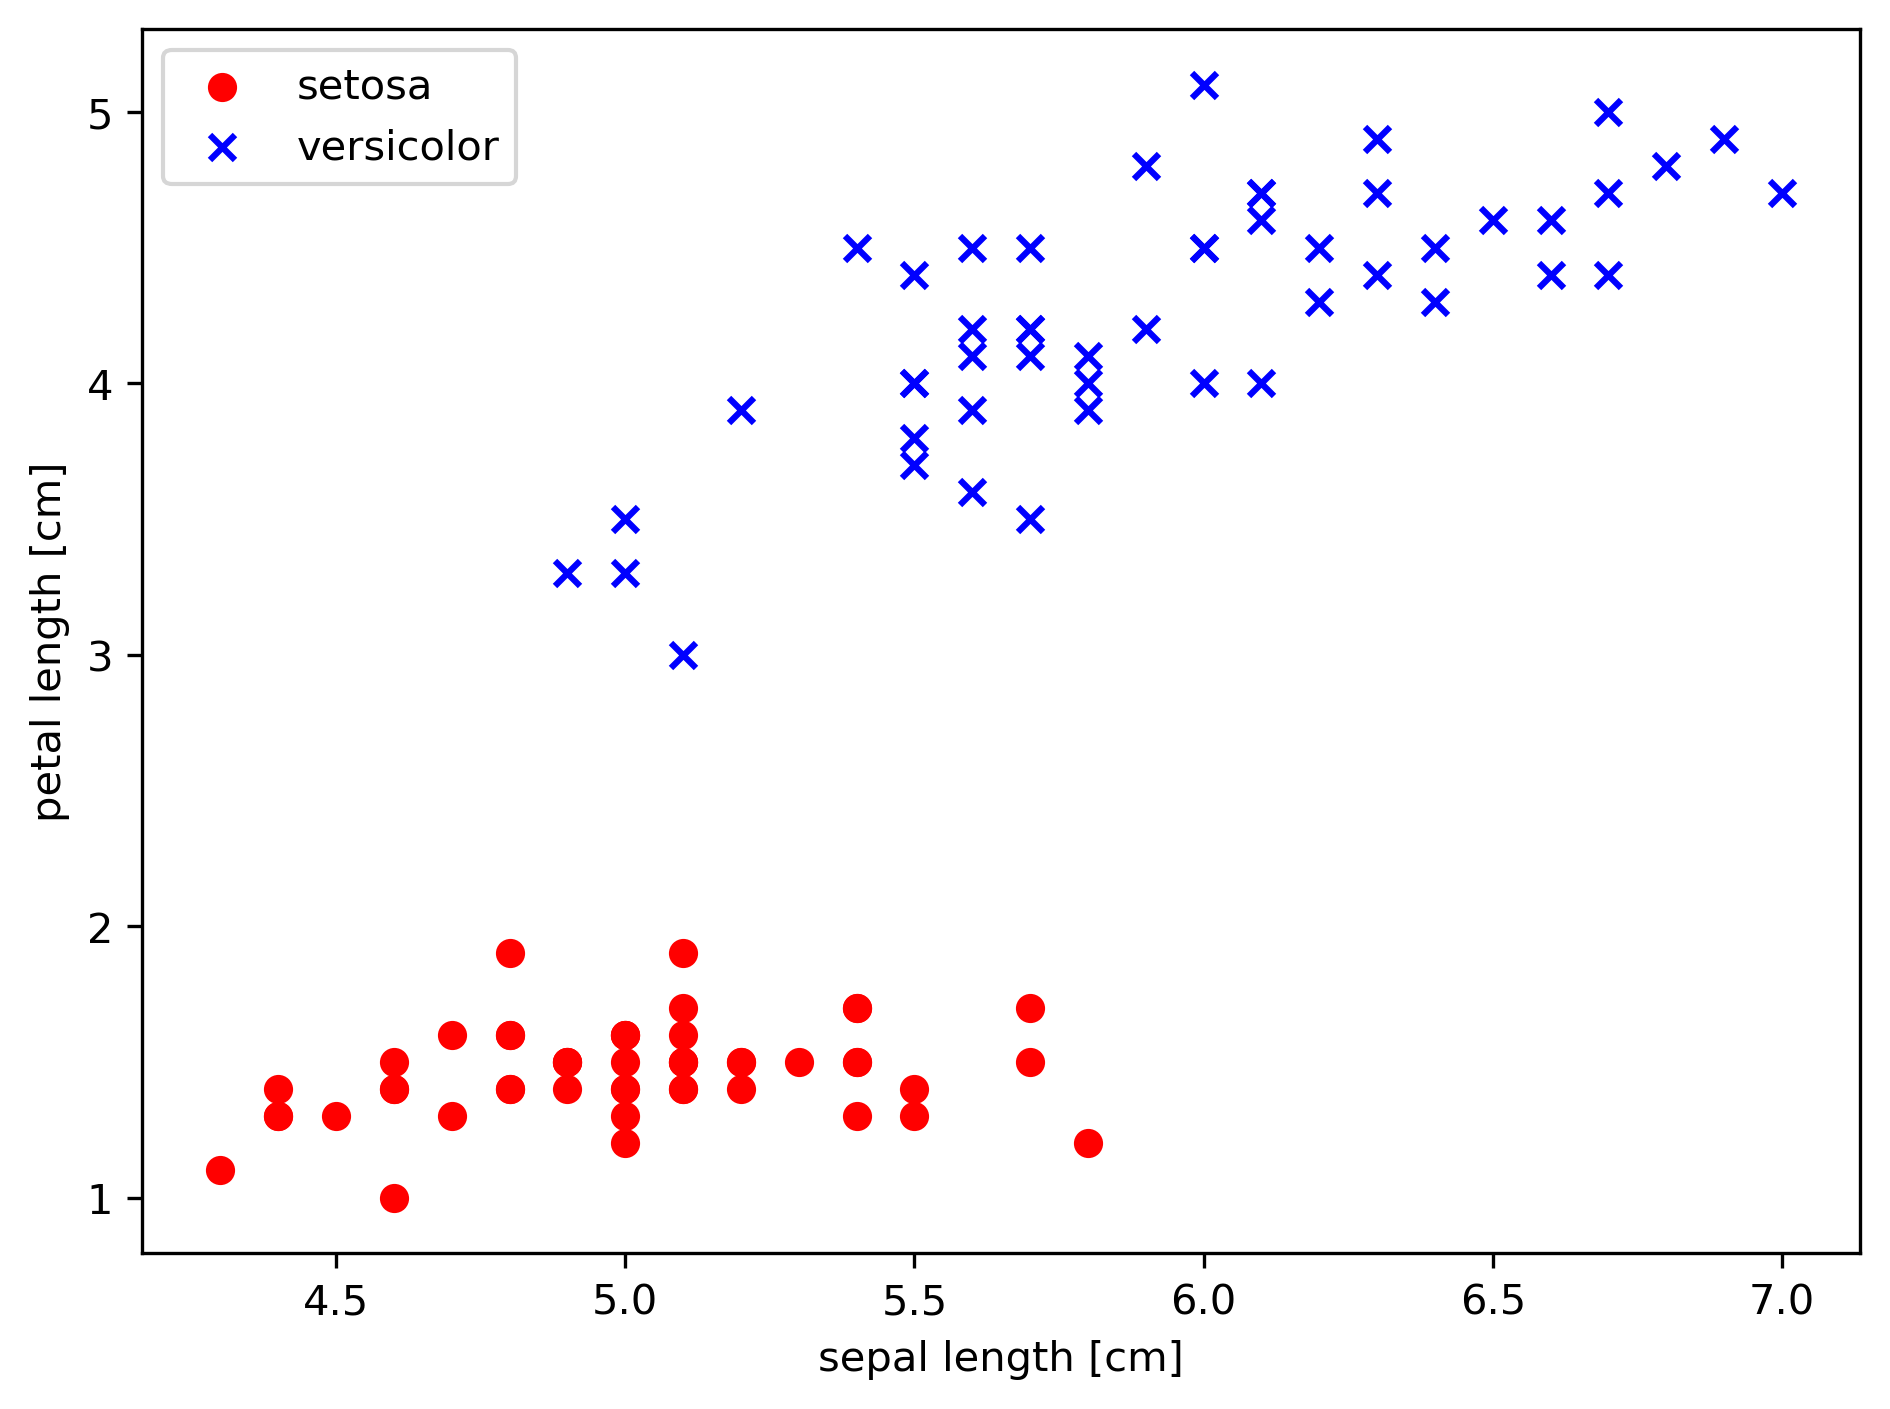

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [28]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [30]:
def plot_decision_boundary(X, y, classifier):    
    
    # replace the two lines below with your code
    x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    x2_interval = [X[:, 1].min() - 1, X[:, 1].max() + 1]
    
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

d:\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


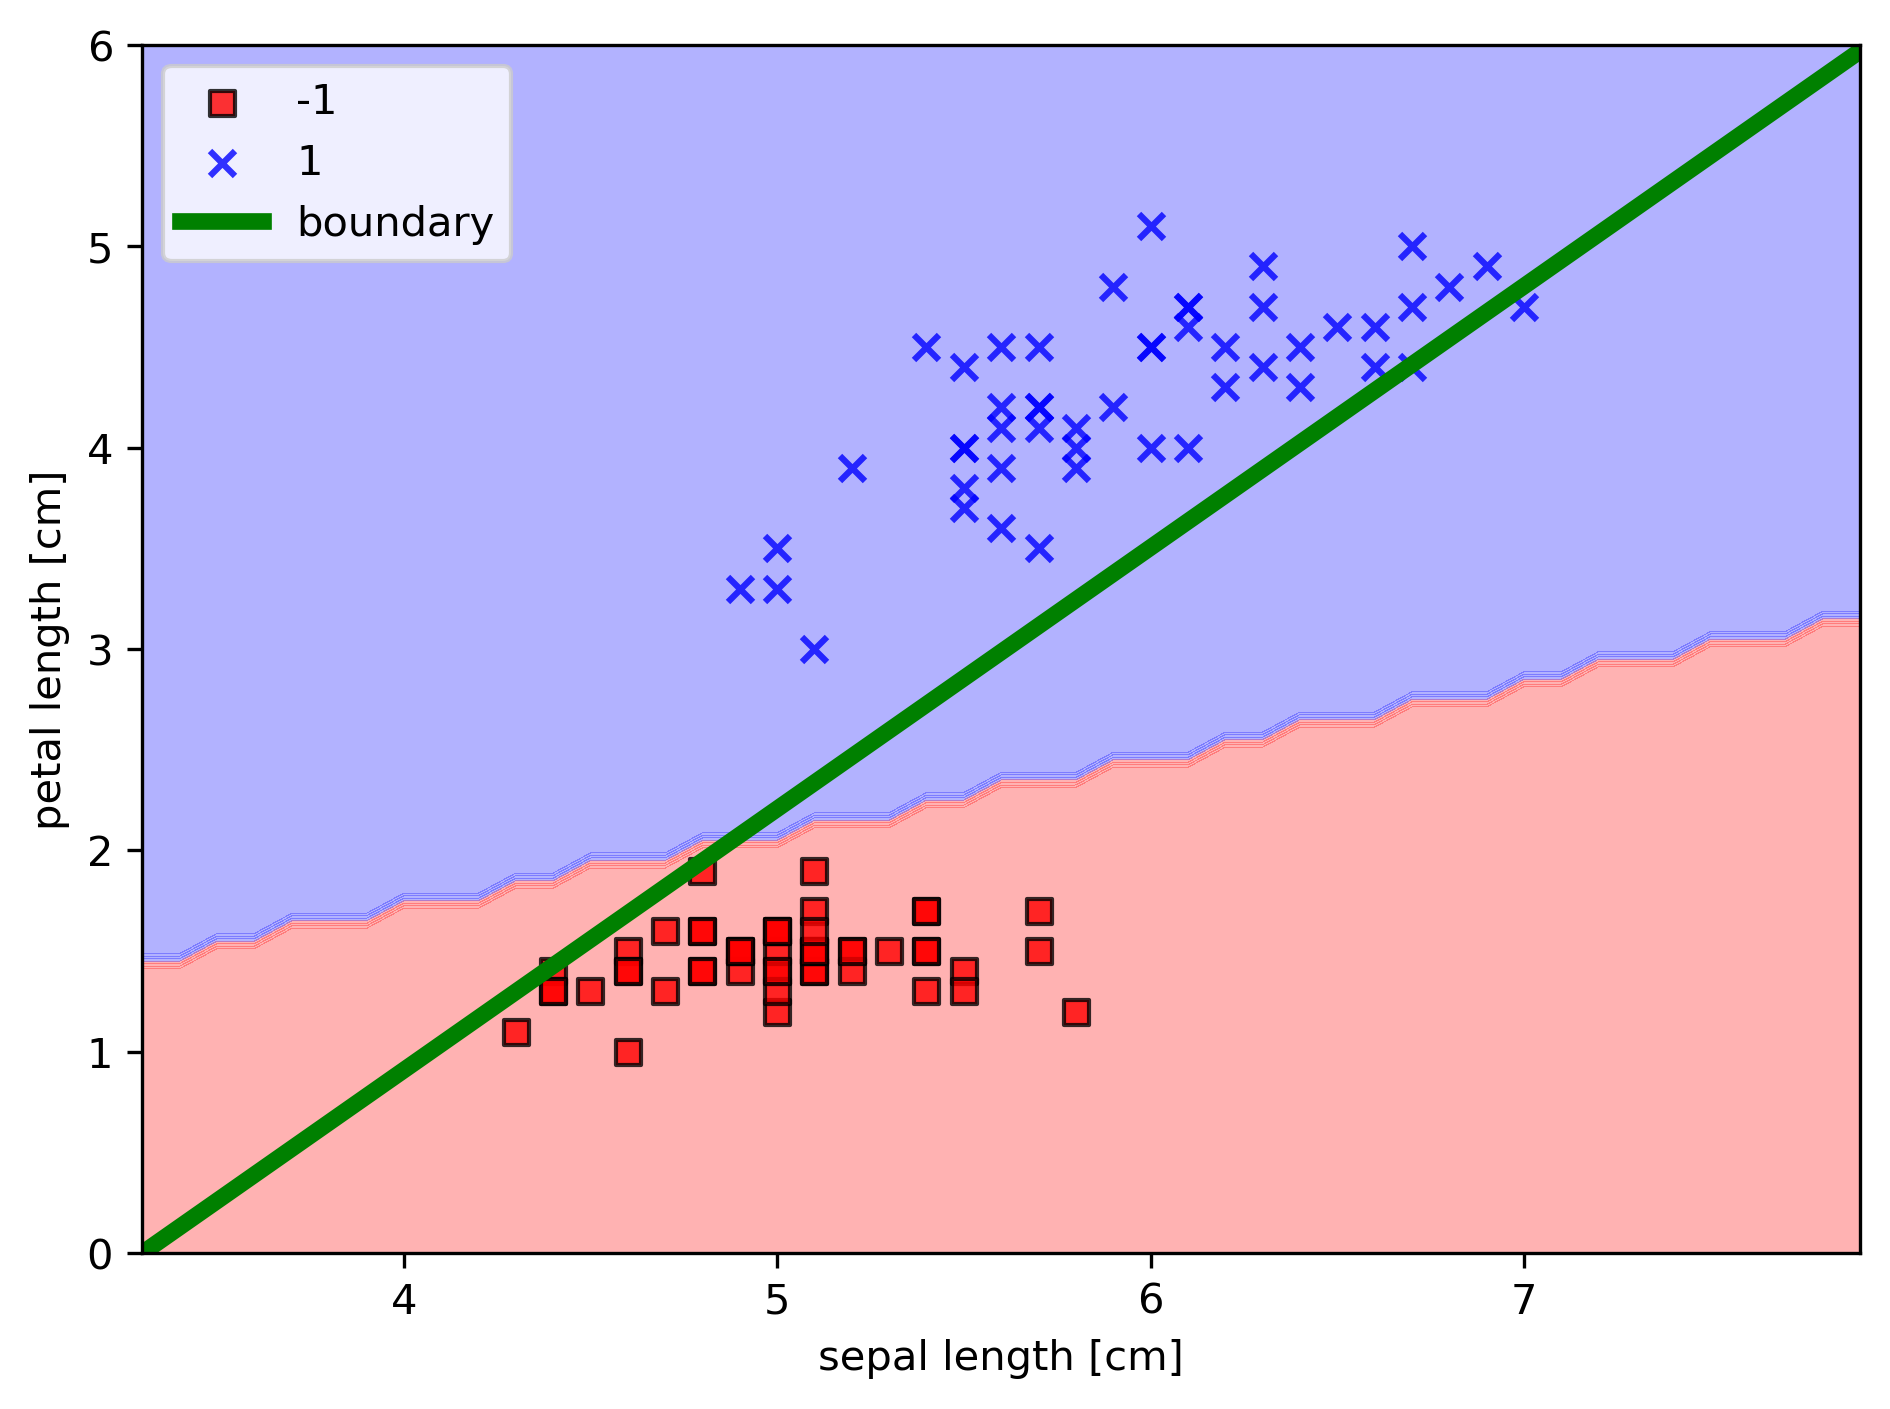

In [31]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


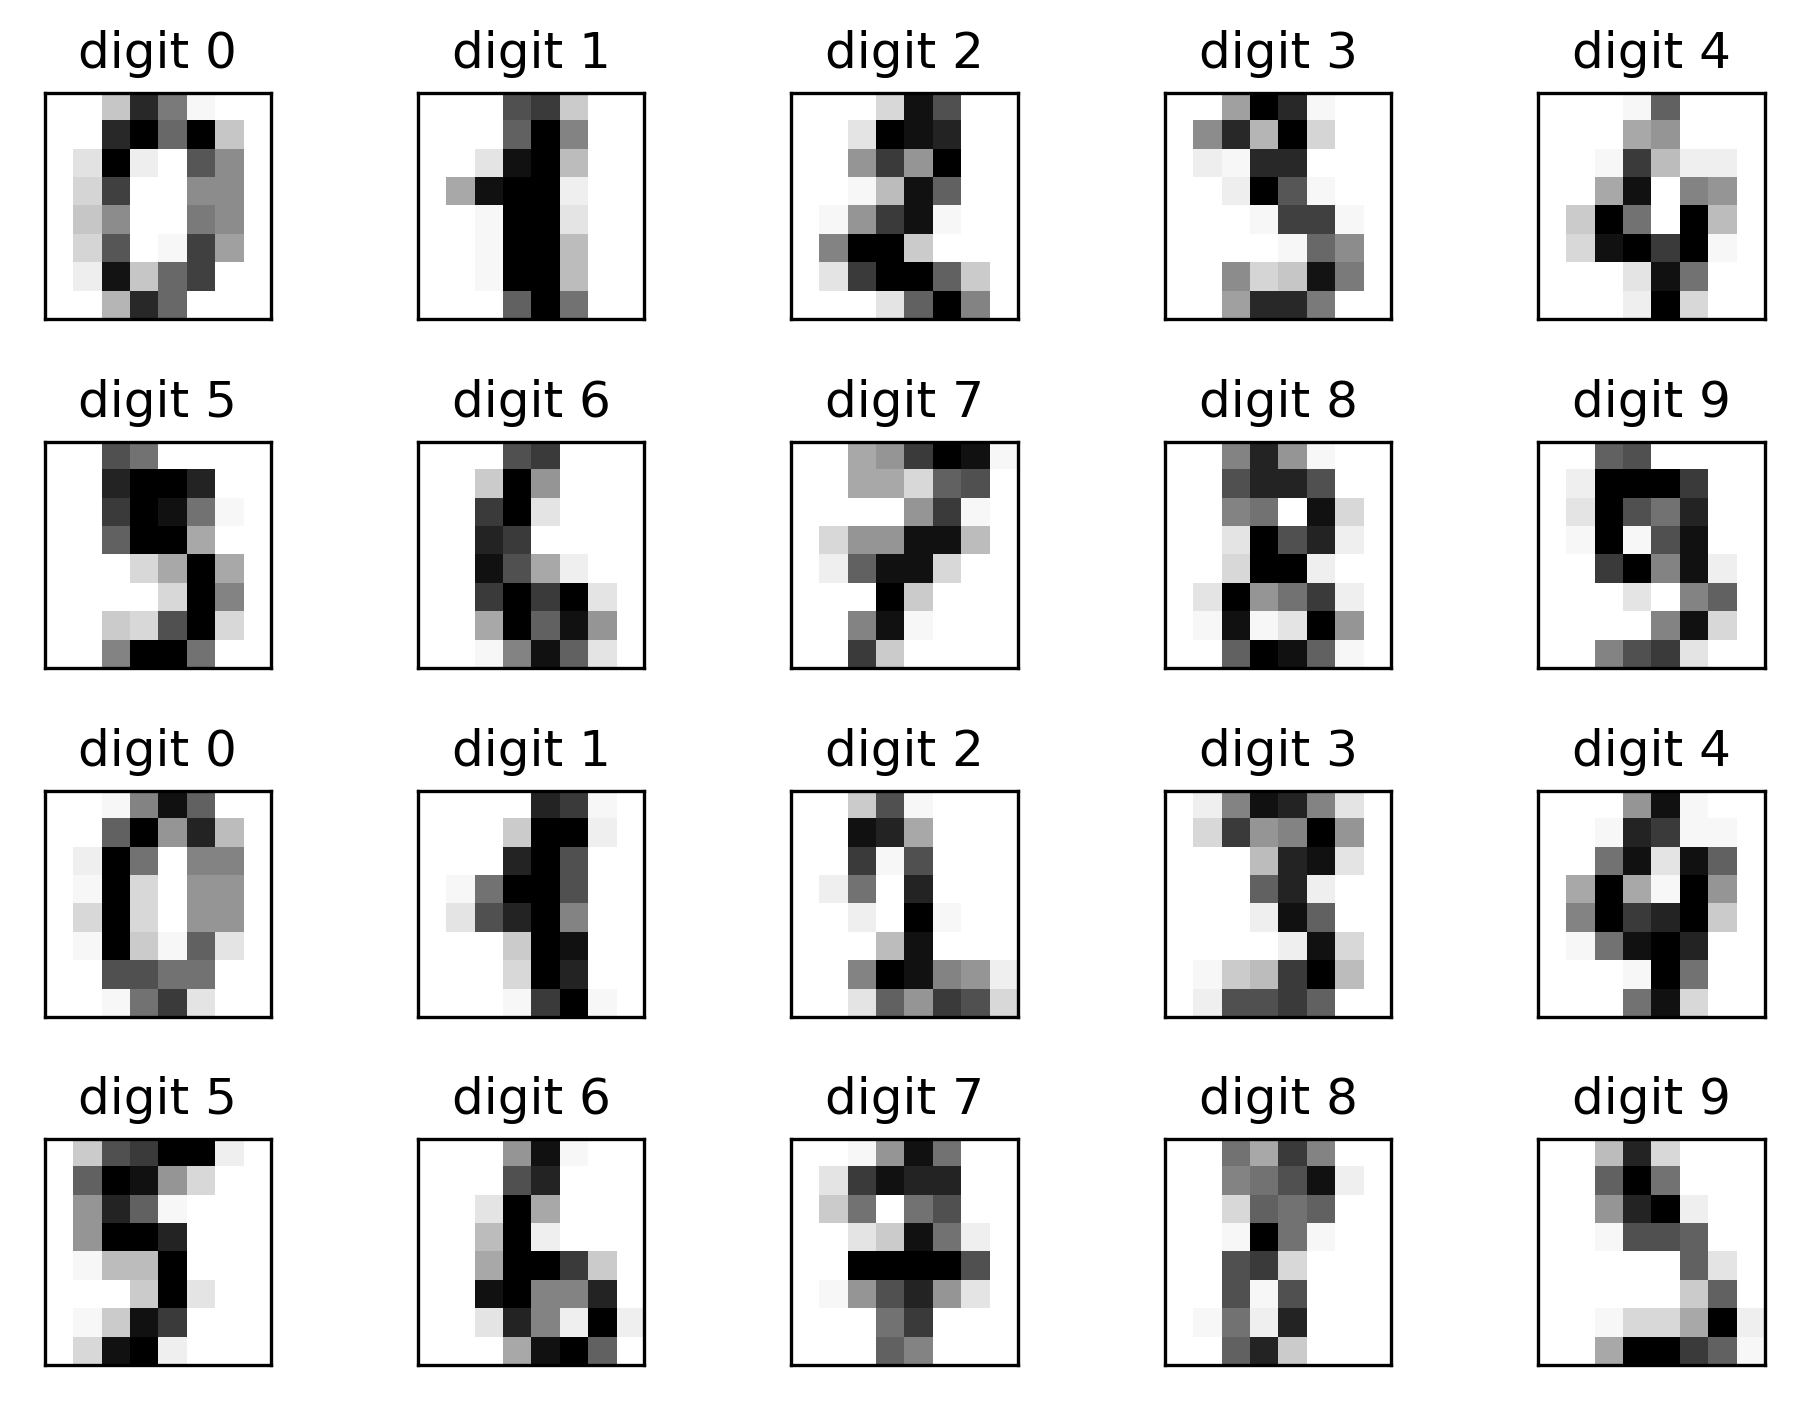

In [33]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Data Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [34]:
#Your code comes here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Classifier #1 Perceptron

In [51]:
#Your code, including training and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.933


Classifier #2 Logistic Regression

In [114]:
#Your code, including training and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.956


Classifier #3 SVM

In [106]:
#Your code, including training and testing, to observe the accuracies.
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.989


Classifier #4 Decision Tree

In [98]:
#Your code, including training and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.219


Classifer #5 Random Forest

In [82]:
#Your code, including training and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=120, 
                                random_state=1, n_jobs=4)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.433


Classifier #6 KNN

In [65]:
#Your code, including training and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.985


### B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

In [ ]:
#Your answer here


## Reference
- https://blog.csdn.net/garfielder007/article/details/51646604 (Latex commands and symbols)
- https://tex.stackexchange.com/questions/146985/removing-the-enumeration-of-align-text
- https://en.wikipedia.org/wiki/NAND_gate
- https://en.wikipedia.org/wiki/NOR_gate
- https://matplotlib.org/stable/index.html
- https://pandas.pydata.org/docs/index.html
- https://scikit-learn.org/stable/index.html
- https://developers.google.com/machine-learning/decision-forests/out-of-bag